In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
train_data = pd.read_csv("train.csv")

# Age 컬럼에 있는 비어있는 row에 Age컬럼의 중앙값을 채워준다.
median_age_train = train_data["Age"].median()
train_data["Age"] = train_data["Age"].fillna(median_age_train)

# Embarked 컬럼에 있는 값들 중에 가장 많이 나온 밸류를 비어있는 row에 채워준다.
mst_frq_embarked_train = train_data["Embarked"].value_counts().index[0]
train_data["Embarked"] = train_data["Embarked"].fillna(mst_frq_embarked_train)

# Embarked 컬럼에 있는 문자열을 int형으로 바꿔준다
Ports = list(enumerate(np.unique(train_data['Embarked'])))
Ports_dict = { name : i for i, name in Ports }
train_data["Embarked"] = train_data["Embarked"].map(lambda x: Ports_dict[x]).astype(int)

# Sex 컬럼에 있는 값들을 Gender 컬럼을 새로 만들어 0,1로 바꿔준다
train_data["Gender"] = 0
train_data["Gender"][train_data["Sex"] == 'male'] = 1

train_data.head()
# train_data.info()
# train_data.describe()

C:\Users\kjh43\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1


In [2]:
test_data = pd.read_csv("test.csv")

# Age 컬럼에 있는 비어있는 row에 Age컬럼의 중앙값을 채워준다.
median_age_test = test_data["Age"].median()
test_data["Age"] = test_data["Age"].fillna(median_age_test)

# Embarked 컬럼에 있는 값들 중에 가장 많이 나온 밸류를 비어있는 row에 채워준다.
mst_frq_embarked_test = test_data["Embarked"].value_counts().index[0]
test_data["Embarked"] = test_data["Embarked"].fillna(mst_frq_embarked_test)

# Embarked 컬럼에 있는 문자열을 int형으로 바꿔준다
test_data["Embarked"] = test_data["Embarked"].map(lambda x: Ports_dict[x]).astype(int)

# Sex 컬럼에 있는 값들을 Gender 컬럼을 새로 만들어 0,1로 바꿔준다
test_data["Gender"] = 0
test_data["Gender"][test_data["Sex"] == 'male'] = 1

# Fare 컬럼에 비어있는 로우에 중앙값으로 채워준다
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

test_data["Survived"] = np.NaN

test_data.head()
test_data.info()
test_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
Gender         418 non-null int64
Survived       0 non-null float64
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 40.9+ KB


C:\Users\kjh43\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kjh43\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,0.0
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535,1.401914,0.636364,NaN
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103,0.854496,0.481622,NaN
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,NaN
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,2.000000,1.000000,NaN
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,2.000000,1.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,1.000000,NaN


In [3]:
X_train = train_data[["Pclass", "Gender", "Age", "Fare", "Embarked", "SibSp", "Parch"]]
y_train = train_data["Survived"]

X_test = test_data[["Pclass", "Gender", "Age", "Fare", "Embarked", "SibSp", "Parch"]]
y_test = test_data["Survived"]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print(clf.feature_importances_)
print(clf.score(X_train, y_train))

[ 0.11018842  0.31088095  0.24505051  0.23841032  0.02055137  0.04870846
  0.02620997]
0.979797979798


In [5]:
clf.predict(X_test)

test_data["Survived"] = clf.predict(X_test)

In [6]:
test_data = pd.DataFrame(test_data, columns=["PassengerId", "Survived"])
test_data.to_csv("decision_tree.csv", index=False)

In [7]:
from sklearn.externals.six import StringIO
with open("tree.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

In [10]:
import os
os.unlink('tree.dot')

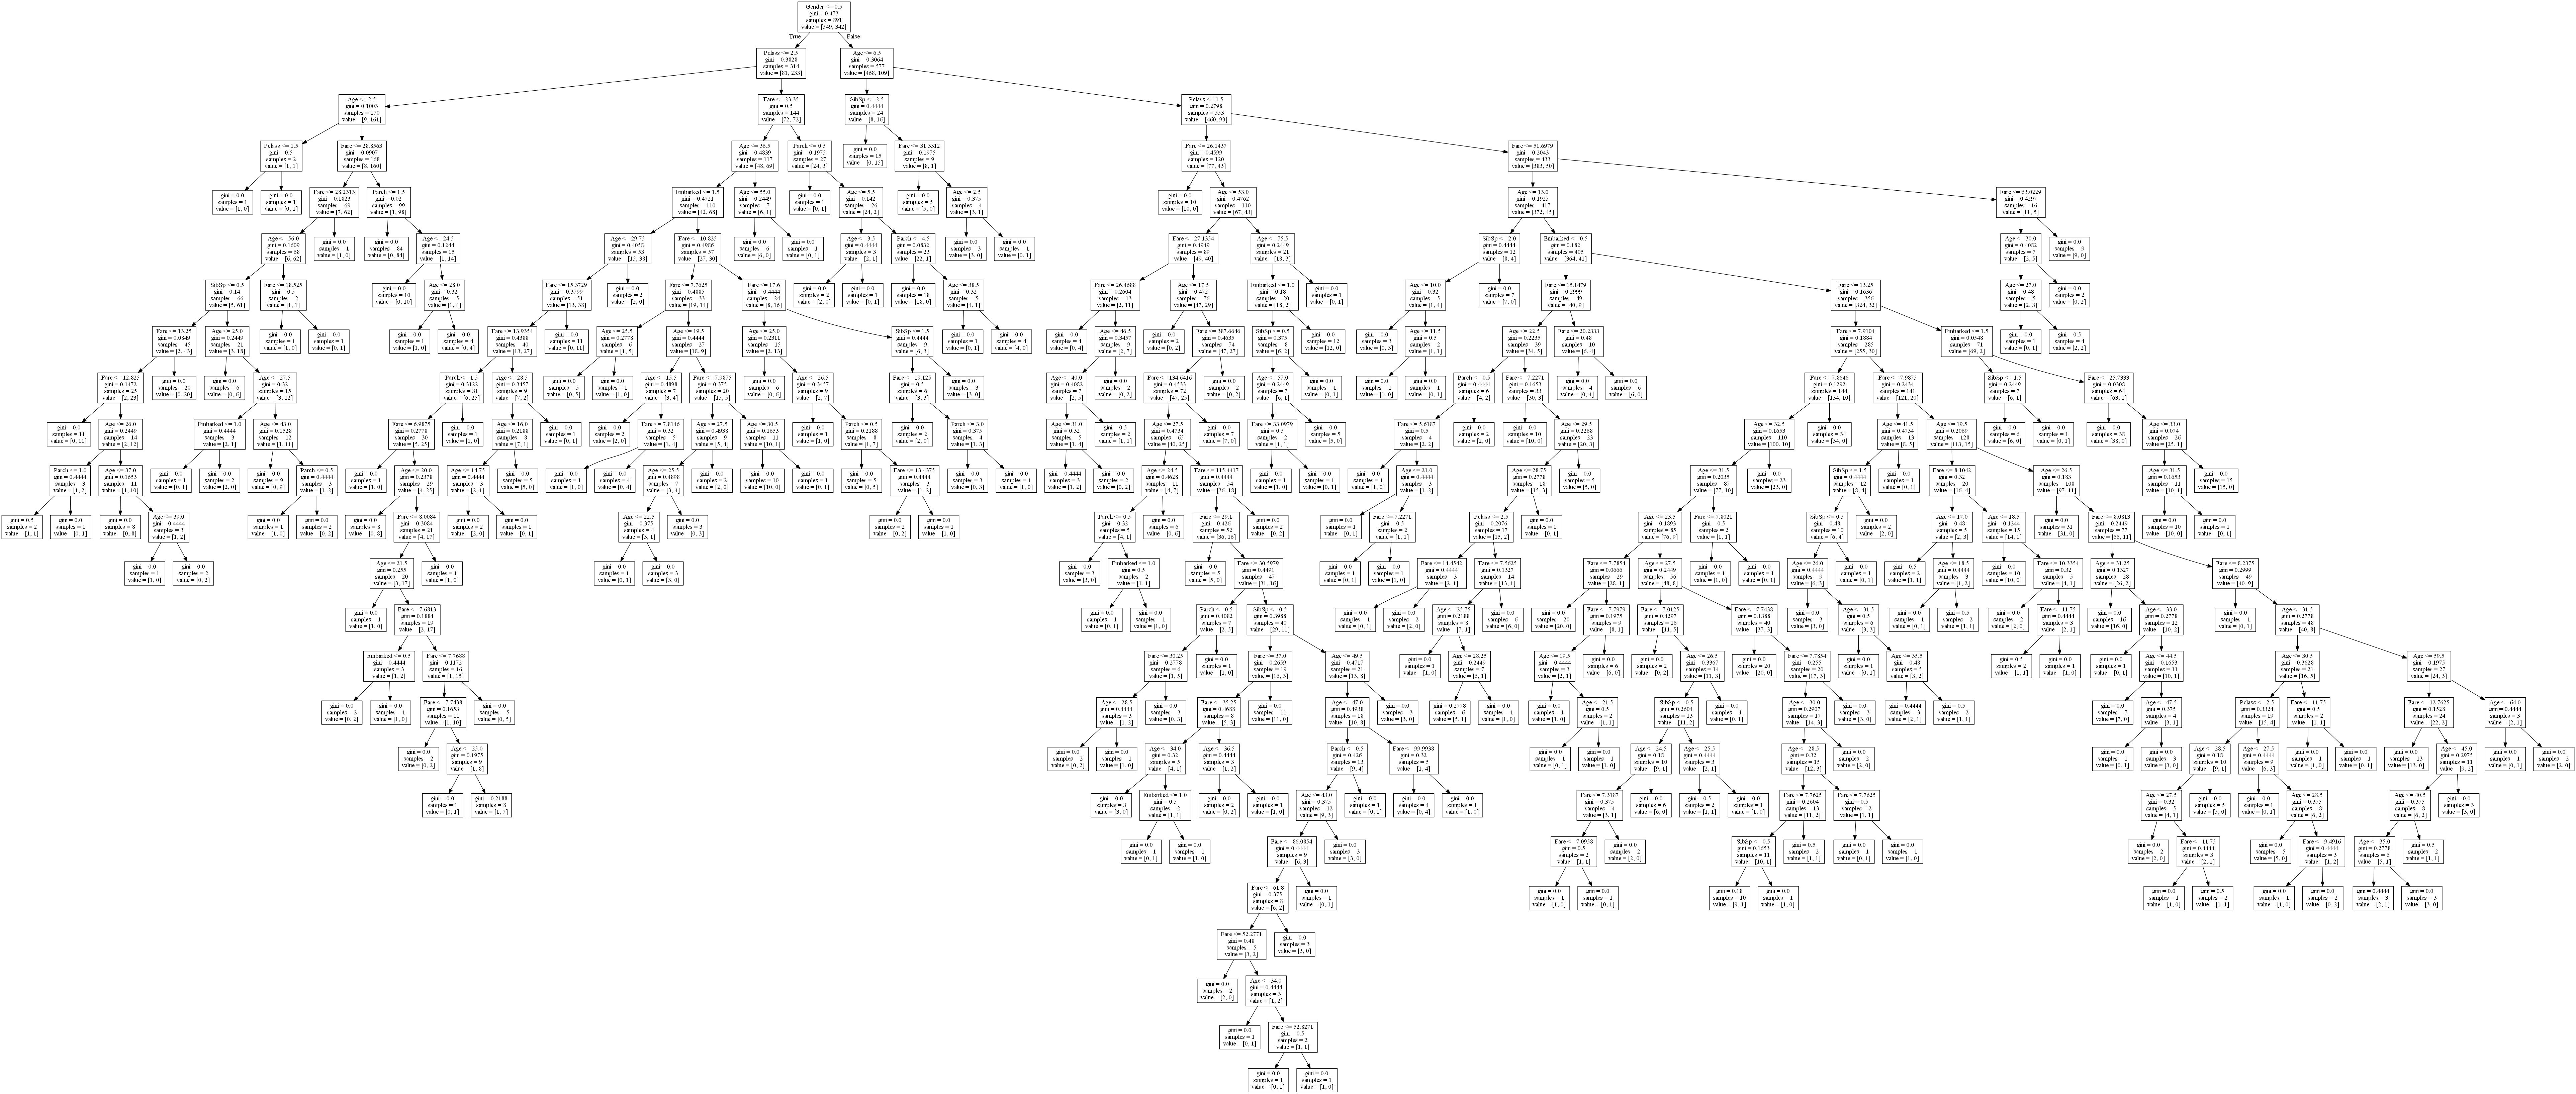

In [10]:
# 테스트 셀
import pydot
import pydotplus
import graphviz
from IPython.display import Image

# dot_data = tree.export_graphviz(clf)
# graph = pydotplus.graph_from_dot_data(dot_data)


# # graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())

# Image(graph.create_png())

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=X_test.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# graph.write_pdf("tree.pdf")